<a href="https://colab.research.google.com/github/Jay0073/Forest-Fire-Detection/blob/main/Forest_Fire_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

100%|██████████| 9.94G/9.94G [01:46<00:00, 101MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [5]:
path = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version'


train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')
validation_dir = os.path.join(path, 'val')

In [6]:
classes = os.listdir(train_dir)
print(classes)

['nofire', 'fire']


In [7]:
# classes diversity
for i in classes:
    print(i, len(os.listdir(os.path.join(train_dir, i))))

nofire 1157
fire 730


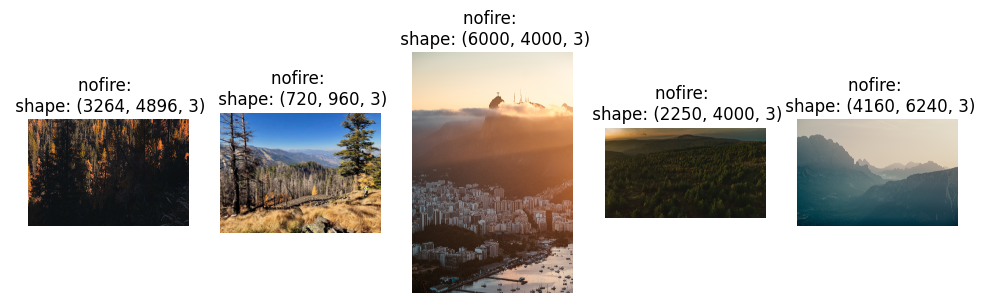

In [8]:
# class visualization
plt.figure(figsize=(12, 10))
for i in range(5):
    class_path = os.path.join(train_dir, classes[0])
    img_name = os.listdir(class_path)[i]
    img_path = os.path.join(class_path, img_name)
    img = plt.imread(img_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"{classes[0]}: \n shape: {img.shape}")
    plt.axis('off')
plt.show()

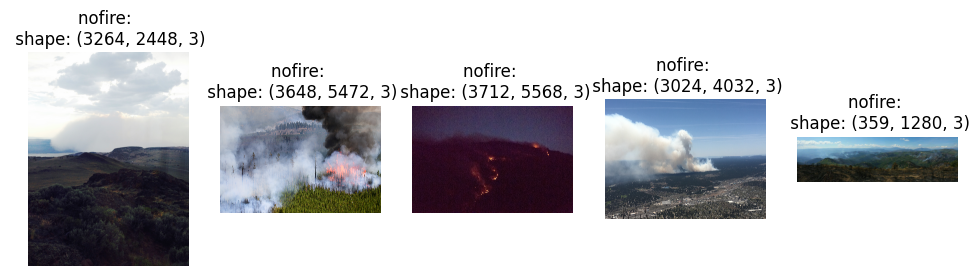

In [9]:
# class visualization

plt.figure(figsize=(12, 10)) # Now plt.figure refers to matplotlib.pyplot.figure
for i in range(5):
    class_path = os.path.join(train_dir, classes[1])
    img_name = os.listdir(class_path)[i]
    img_path = os.path.join(class_path, img_name)
    img = plt.imread(img_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"{classes[0]}: \n shape: {img.shape}")
    plt.axis('off')
plt.show()

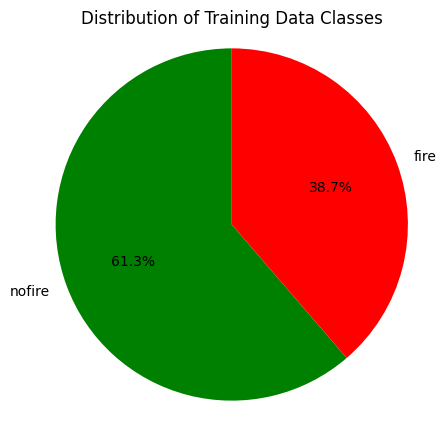

In [10]:
# Assuming train_dir is defined as before
classes = os.listdir(train_dir)
class_counts = [len(os.listdir(os.path.join(train_dir, i))) for i in classes]

# Create pie chart
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=classes, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Distribution of Training Data Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
def get_image_sizes(directory):
    """Gets the sizes of all images in a directory and its subdirectories."""
    sizes = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = plt.imread(img_path)
                sizes.append(img.shape[:2])  # Store width and height
    return sizes

# Get image sizes for the training dataset
train_sizes = get_image_sizes(train_dir)

# Convert to NumPy array for easier calculations
train_sizes = np.array(train_sizes)

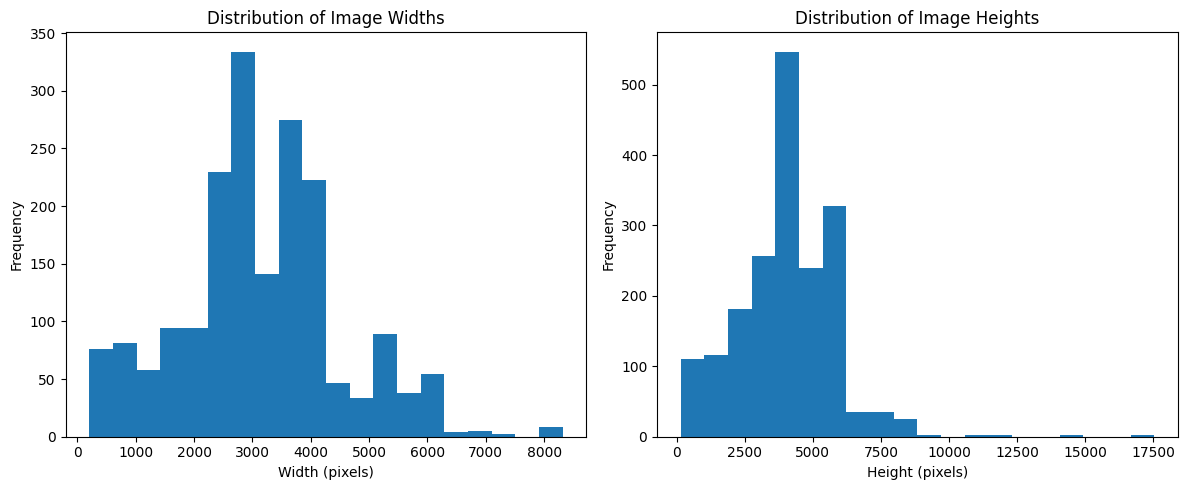

In [14]:
# Create histograms to visualize size variations
plt.figure(figsize=(12, 5))

# Histogram for width
plt.subplot(1, 2, 1)
plt.hist(train_sizes[:, 0], bins=20)  # Widths are in the first column
plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

# Histogram for height
plt.subplot(1, 2, 2)
plt.hist(train_sizes[:, 1], bins=20)  # Heights are in the second column
plt.title('Distribution of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()